In [1]:
pip install tensorflow opencv-python numpy pandas streamlit torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np

# Path to dataset folders
data_dir = "path/to/ai4mars-dataset-merged-0.1"
image_dir = os.path.join(data_dir, 'msl/images/edr')
label_dir = os.path.join(data_dir, 'msl/labels/test/masked-gold-min1-100agree')

# Load example image and label
image_path = os.path.join(image_dir, 'msl/images/edr/NLA_397681339EDR_F0020000AUT_04096M1.JPG')
label_path = os.path.join(label_dir, 'msl/images/edr/NLA_397681339EDR_F0020000AUT_04096M1.JPG')

image = cv2.imread(image_path)
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

[ WARN:0@0.038] global loadsave.cpp:241 findDecoder imread_('path/to/ai4mars-dataset-merged-0.1/msl/images/edr/msl/images/edr/NLA_397681339EDR_F0020000AUT_04096M1.JPG'): can't open/read file: check file path/integrity
[ WARN:0@0.038] global loadsave.cpp:241 findDecoder imread_('path/to/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree/msl/images/edr/NLA_397681339EDR_F0020000AUT_04096M1.JPG'): can't open/read file: check file path/integrity


In [3]:
import os
import cv2


data_dir = "path/to/ai4mars-dataset-merged-0.1"
image_dir = os.path.join(data_dir, 'msl/images/edr')
label_dir = os.path.join(data_dir, 'msl/labels/test/masked-gold-min1-100agree')

# Load example image and label fr it testingggg
image_path = os.path.join(image_dir, 'NLA_397586934EDR_F0010008AUT_04096M1 copy.JPG')
label_path = os.path.join(label_dir, 'NLA_397586934EDR_F0010008AUT_04096M1 copy.JPG')


if not os.path.isfile(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")
if not os.path.isfile(label_path):
    raise FileNotFoundError(f"Label file not found: {label_path}")


image = cv2.imread(image_path)
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)


if image is None:
    raise ValueError(f"Error loading image: {image_path}")
if label is None:
    raise ValueError(f"Error loading label: {label_path}")


cv2.imshow('Image', image)
cv2.imshow('Label', label)
cv2.waitKey(0)
cv2.destroyAllWindows()


FileNotFoundError: Image file not found: path/to/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397586934EDR_F0010008AUT_04096M1 copy.JPG

In [4]:
import os
import cv2
import numpy as np

# Path to dataset folders
data_dir = "/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1"
image_dir = os.path.join(data_dir, 'msl/images/edr')
label_dir = os.path.join(data_dir, 'msl/labels/test/masked-gold-min1-100agree')

# Load example image and label
image_path = os.path.join(image_dir, 'NLA_397681372EDR_F0020000AUT_04096M1.JPG')
label_path = os.path.join(label_dir, 'NLA_409036993EDR_F0051662NCAM05703M1_merged.png')

# Read image and label
image = cv2.imread(image_path)
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

# Check if the image and label were loaded successfully
if image is None:
    raise ValueError(f"Error loading image: {image_path}")
if label is None:
    raise ValueError(f"Error loading label: {label_path}")

# Example processing (if needed)
# For demonstration purposes, we will display the shapes of the images
print("Image shape:", image.shape)
print("Label shape:", label.shape)

Image shape: (1024, 1024, 3)
Label shape: (1024, 1024)


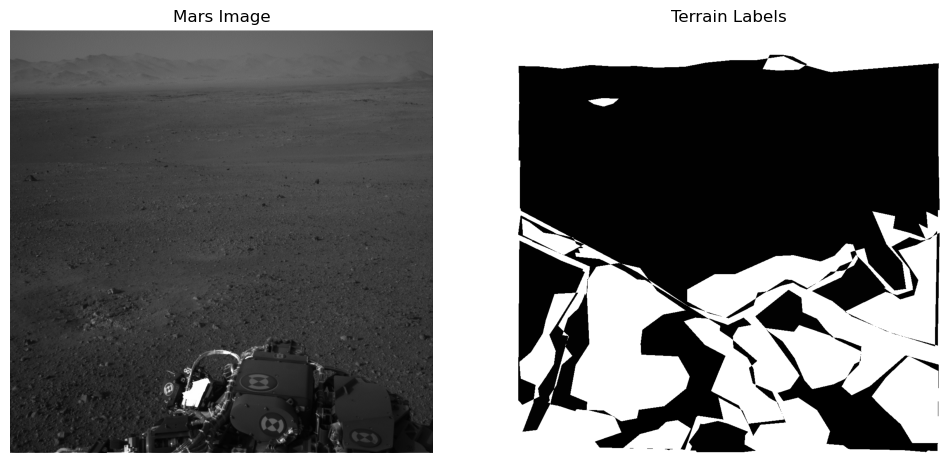

In [5]:
import cv2
import matplotlib.pyplot as plt
import os


data_dir = "/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1"
image_dir = os.path.join(data_dir, 'msl/images/edr')
label_dir = os.path.join(data_dir, 'msl/labels/test/masked-gold-min1-100agree')


image_path = os.path.join(image_dir, 'NLA_397681372EDR_F0020000AUT_04096M1.JPG')
label_path = os.path.join(label_dir, 'NLA_409036993EDR_F0051662NCAM05703M1_merged.png')


if not os.path.isfile(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")
if not os.path.isfile(label_path):
    raise FileNotFoundError(f"Label file not found: {label_path}")


image = cv2.imread(image_path)
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)


if image is None:
    raise ValueError(f"Error loading image: {image_path}")
if label is None:
    raise ValueError(f"Error loading label: {label_path}")

# Display image and label using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Mars Image')
plt.axis('off')  # Hide axis for better visualization

plt.subplot(1, 2, 2)
plt.imshow(label, cmap='gray')
plt.title('Terrain Labels')
plt.axis('off')  # Hide axis for better visualization

plt.show()

Feature : Edge Detection <br>
Use algorithms like Canny Edge Detection to highlight terrain edges. This could help detect landing zones by identifying flat regions.


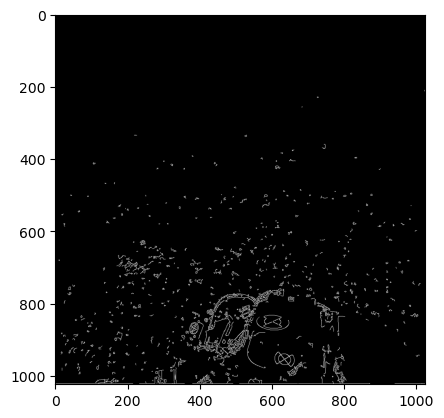

In [6]:
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')

SIFT (Scale-Invariant Feature Transform):<br>

Extract key terrain features to find potential landing zones by analyzing local gradients.

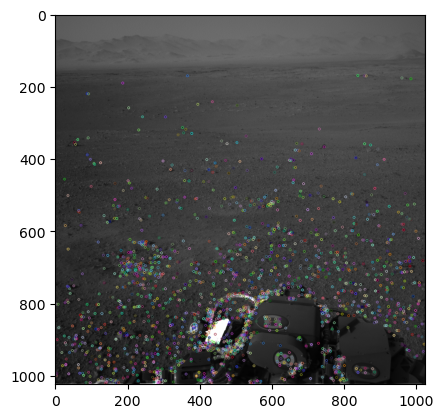

In [7]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1"
image_dir = os.path.join(data_dir, 'msl/images/edr')
label_dir = os.path.join(data_dir, 'msl/labels/test/masked-gold-min1-100agree')
mxy_mask_dir = os.path.join(data_dir, 'msl/images/mxy')
rng_mask_dir = os.path.join(data_dir, 'msl/images/rng-30m')

def load_image(image_path):
    return cv2.imread(image_path)

def preprocess_image(image, rover_mask, range_mask):
    image[rover_mask == 1] = 0  # Remove rover pixels
    image[range_mask == 1] = 0  # Remove distant pixels
    return image

def load_and_preprocess_data(image_filename, label_filename, rover_mask_filename, range_mask_filename):
    image_path = os.path.join(image_dir, image_filename)
    label_path = os.path.join(label_dir, label_filename)
    rover_mask_path = os.path.join(mxy_mask_dir, rover_mask_filename)
    range_mask_path = os.path.join(rng_mask_dir, range_mask_filename)

    image = load_image(image_path)
    label = load_image(label_path, cv2.IMREAD_GRAYSCALE)
    rover_mask = load_image(rover_mask_path, cv2.IMREAD_GRAYSCALE)
    range_mask = load_image(range_mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or label is None or rover_mask is None or range_mask is None:
        raise ValueError(f"Error loading data from {image_path}, {label_path}, {rover_mask_path}, {range_mask_path}")

    image = preprocess_image(image, rover_mask, range_mask)
    return image, label

# Example usage
image_filename = 'NLA_397681372EDR_F0020000AUT_04096M1.JPG'
label_filename = 'NLA_409036068EDR_F0051606NCAM00348M1_merged.png'
rover_mask_filename = 'example_mask.png'
range_mask_filename = 'example_range_mask.png'

image, label = load_and_preprocess_data(image_filename, label_filename, rover_mask_filename, range_mask_filename)

# Display example
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Processed Mars Image')

plt.subplot(1, 2, 2)
plt.imshow(label, cmap='gray')
plt.title('Terrain Labels')
plt.show()


TypeError: load_image() takes 1 positional argument but 2 were given

In [9]:
def load_image(image_path, mode=cv2.IMREAD_COLOR):
    return cv2.imread(image_path, mode)

In [10]:
def load_and_preprocess_data(image_filename, label_filename, rover_mask_filename, range_mask_filename):
    image_path = os.path.join(image_dir, image_filename)
    label_path = os.path.join(label_dir, label_filename)
    rover_mask_path = os.path.join(mxy_mask_dir, rover_mask_filename)
    range_mask_path = os.path.join(rng_mask_dir, range_mask_filename)

    image = load_image(image_path)
    label = load_image(label_path, cv2.IMREAD_GRAYSCALE)
    rover_mask = load_image(rover_mask_path, cv2.IMREAD_GRAYSCALE)
    range_mask = load_image(range_mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or label is None or rover_mask is None or range_mask is None:
        raise ValueError(f"Error loading data from {image_path}, {label_path}, {rover_mask_path}, {range_mask_path}")

    image = preprocess_image(image, rover_mask, range_mask)
    return image, label

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1"
image_dir = os.path.join(data_dir, 'msl/images/edr')
label_dir = os.path.join(data_dir, 'msl/labels/test/masked-gold-min1-100agree')
mxy_mask_dir = os.path.join(data_dir, 'msl/images/mxy')
rng_mask_dir = os.path.join(data_dir, 'msl/images/rng-30m')

def load_image(image_path, mode=cv2.IMREAD_COLOR):
    return cv2.imread(image_path, mode)

def preprocess_image(image, rover_mask, range_mask):
    image[rover_mask == 1] = 0  # Remove rover pixels
    image[range_mask == 1] = 0  # Remove distant pixels
    return image

def load_and_preprocess_data(image_filename, label_filename, rover_mask_filename, range_mask_filename):
    image_path = os.path.join(image_dir, image_filename)
    label_path = os.path.join(label_dir, label_filename)
    rover_mask_path = os.path.join(mxy_mask_dir, rover_mask_filename)
    range_mask_path = os.path.join(rng_mask_dir, range_mask_filename)

    image = load_image(image_path)
    label = load_image(label_path, cv2.IMREAD_GRAYSCALE)
    rover_mask = load_image(rover_mask_path, cv2.IMREAD_GRAYSCALE)
    range_mask = load_image(range_mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or label is None or rover_mask is None or range_mask is None:
        raise ValueError(f"Error loading data from {image_path}, {label_path}, {rover_mask_path}, {range_mask_path}")

    image = preprocess_image(image, rover_mask, range_mask)
    return image, label

# Example usage
image_filename = 'NLA_397681372EDR_F0020000AUT_04096M1.JPG'
label_filename = 'NLA_409036068EDR_F0051606NCAM00348M1_merged.png'
rover_mask_filename = 'example_mask.png'
range_mask_filename = 'example_range_mask.png'

image, label = load_and_preprocess_data(image_filename, label_filename, rover_mask_filename, range_mask_filename)

# Display example
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Processed Mars Image')

plt.subplot(1, 2, 2)
plt.imshow(label, cmap='gray')
plt.title('Terrain Labels')
plt.show()


[ WARN:0@9832.910] global loadsave.cpp:241 findDecoder imread_('/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/mxy/example_mask.png'): can't open/read file: check file path/integrity
[ WARN:0@9832.910] global loadsave.cpp:241 findDecoder imread_('/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/rng-30m/example_range_mask.png'): can't open/read file: check file path/integrity


ValueError: Error loading data from /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681372EDR_F0020000AUT_04096M1.JPG, /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree/NLA_409036068EDR_F0051606NCAM00348M1_merged.png, /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/mxy/example_mask.png, /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/rng-30m/example_range_mask.png

In [12]:
# Example usage with updated filenames
image_filename = 'NLA_397681398EDR_F0020000AUT_04096M1.JPG'
label_filename = 'NLA_409036068EDR_F0051606NCAM00348M1_merged.png'  # Ensure this label file corresponds to the image
rover_mask_filename = 'example_mask.png'  # Use actual rover mask file if available
range_mask_filename = 'example_range_mask.png'  # Use actual range mask file if available


In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
data_dir = "/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1"
image_dir = os.path.join(data_dir, 'msl/images/edr')
label_dir = os.path.join(data_dir, 'msl/labels/test/masked-gold-min1-100agree')
mxy_mask_dir = os.path.join(data_dir, 'msl/images/mxy')
rng_mask_dir = os.path.join(data_dir, 'msl/images/rng-30m')

def load_image(image_path, mode=cv2.IMREAD_COLOR):
    return cv2.imread(image_path, mode)

def preprocess_image(image, rover_mask, range_mask):
    image[rover_mask == 1] = 0  # Remove rover pixels
    image[range_mask == 1] = 0  # Remove distant pixels
    return image

def load_and_preprocess_data(image_filename, label_filename, rover_mask_filename, range_mask_filename):
    image_path = os.path.join(image_dir, image_filename)
    label_path = os.path.join(label_dir, label_filename)
    rover_mask_path = os.path.join(mxy_mask_dir, rover_mask_filename)
    range_mask_path = os.path.join(rng_mask_dir, range_mask_filename)

    image = load_image(image_path)
    label = load_image(label_path, cv2.IMREAD_GRAYSCALE)
    rover_mask = load_image(rover_mask_path, cv2.IMREAD_GRAYSCALE)
    range_mask = load_image(range_mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or label is None or rover_mask is None or range_mask is None:
        raise ValueError(f"Error loading data from {image_path}, {label_path}, {rover_mask_path}, {range_mask_path}")

    image = preprocess_image(image, rover_mask, range_mask)
    return image, label

# Example usage with updated filenames
image_filename = 'NLA_397681398EDR_F0020000AUT_04096M1.JPG'
label_filename = 'NLA_409036068EDR_F0051606NCAM00348M1_merged.png'
rover_mask_filename = 'example_mask.png'  # Replace with actual mask file if available
range_mask_filename = 'example_range_mask.png'  # Replace with actual range mask file if available

image, label = load_and_preprocess_data(image_filename, label_filename, rover_mask_filename, range_mask_filename)

# Display example
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Processed Mars Image')
plt.axis('off')  # Hide axis for better visualization

plt.subplot(1, 2, 2)
plt.imshow(label, cmap='gray')
plt.title('Terrain Labels')
plt.axis('off')  # Hide axis for better visualization

plt.show()


[ WARN:0@9857.556] global loadsave.cpp:241 findDecoder imread_('/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/mxy/example_mask.png'): can't open/read file: check file path/integrity
[ WARN:0@9857.556] global loadsave.cpp:241 findDecoder imread_('/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/rng-30m/example_range_mask.png'): can't open/read file: check file path/integrity


ValueError: Error loading data from /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681398EDR_F0020000AUT_04096M1.JPG, /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree/NLA_409036068EDR_F0051606NCAM00348M1_merged.png, /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/mxy/example_mask.png, /Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/rng-30m/example_range_mask.png

**USING THE EDGE DETECTION AND SIFT TO TRAIN MODEL**


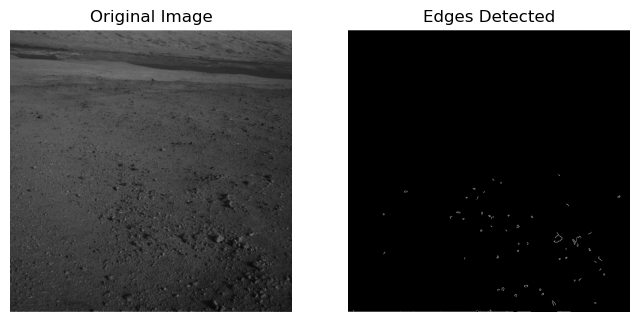

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681486EDR_F0020000AUT_04096M1.JPG'  # Update this path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny Edge Detector
edges = cv2.Canny(blurred_image, 100, 200)

# Display the result
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
plt.axis('off')

plt.show()


**SIFT**

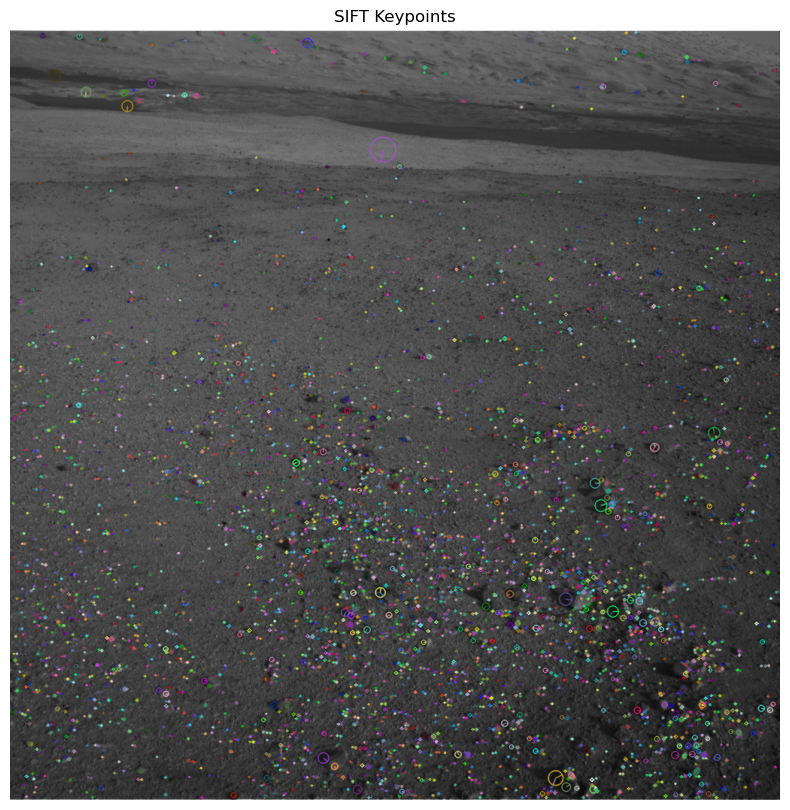

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681486EDR_F0020000AUT_04096M1.JPG'  # Update this path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create SIFT detector object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

**Now, Let's apply The SIFT on the Edge-Detected Image**

**How does it help?**<br>

Keypoint Detection:<br>
SIFT might detect fewer key points because edge-detected images lack gradient information in smooth regions.<br>
The key points are more concentrated around strong edges or corners.<br>
Descriptor Computation:<br>
The descriptors may be less informative since gradient orientations in edge-detected images are binary (strong/no edge) rather than continuous.
Feature Matching:<br>
Matching SIFT descriptors from edge-detected images can lead to false positives or reduced accuracy, as much of the rich detail required for robust matching is lost.<br>


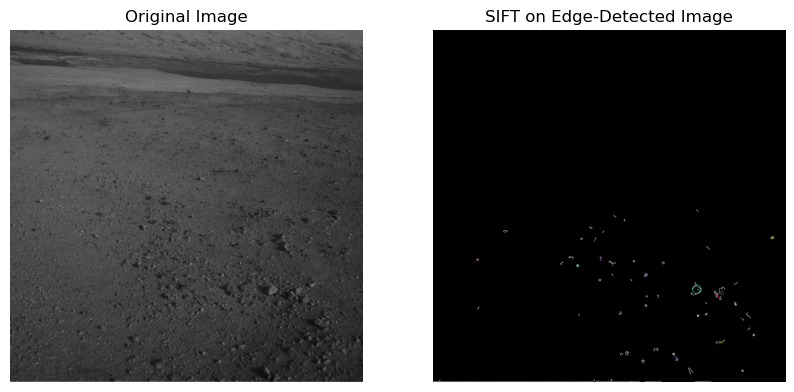

In [16]:
# Load the image
image_path = '/Users/shashikumarezhil/Downloads/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681486EDR_F0020000AUT_04096M1.JPG'  # Update this path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny Edge Detector
edges = cv2.Canny(blurred_image, 100, 200)

# Create SIFT detector object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors on the edge-detected image
keypoints, descriptors = sift.detectAndCompute(edges, None)

# Draw keypoints on the edge-detected image
image_with_keypoints = cv2.drawKeypoints(edges, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('SIFT on Edge-Detected Image')
plt.axis('off')

plt.show()
